
Chadric Garrick

MSBD566

September 30, 2025

Honor Statement:

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

Pollen Count Pollen Level
0.0 to 2.4 Low
2.5 to 4.8 Low – Medium
4.9 to 7.2 Medium
7.3 to 9.6 Medium – High
9.7 to 12.0 High

Source:
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about
2. https://www.nashville.gov/departments/health/environmental-health/air-pollutioncontrol/daily-aqi-and-pollen-count


Question 1: Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
a. How many times has the AQI been recorded above 120?
b. When did the Air Quality Index Category become unhealthy?

Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?

Question 4: [A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.

In [43]:
#Question 1: Explore the data by plotting AQI and Category across the years in two separate plots. 

#Make sure they have proper labels and titles. Use a datetime format for the dates.

# a. How many times has the AQI been recorded above 120?

# b. When did the Air Quality Index Category become unhealthy?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn

import time

# Load the dataset

aq_pc_data = pd.read_csv('/Users/chadric/Downloads/Air_Quality_and_Pollen_Count.csv')

In [44]:
print(aq_pc_data.head())

   OBJECTID   AQI  Category ResponsiblePollutant  PollenCount PollenType  \
0         1  47.0      Good                PM2.5          9.0    Juniper   
1         2  49.0      Good                PM2.5          1.0        Elm   
2         3  51.0  Moderate                PM2.5         11.0        Elm   
3         4  50.0      Good                PM2.5         10.0        Elm   
4         5  50.0      Good                PM2.5          2.0        Elm   

  PollenDescription          ReportDateTime  
0             Maple  2025/04/04 05:00:00+00  
1           Juniper  2025/04/03 05:00:00+00  
2           Juniper  2025/04/02 05:00:00+00  
3           Juniper  2025/04/01 05:00:00+00  
4           Juniper  2025/03/31 05:00:00+00  


In [ ]:

#Convert ReportDateTime to datetime and set as index
aq_pc_data['ReportDateTime'] = pd.to_datetime(aq_pc_data['ReportDateTime'], errors='coerce')
aq_pc_data = aq_pc_data.set_index('ReportDateTime')

#Plot Category across years
plt.figure(figsize=(12,6))
plt.scatter(aq_pc_data.index, aq_pc_data['Category'], alpha=0.6)

plt.xlabel("Year")
plt.ylabel("AQI Category")
plt.title("Air Quality Index Categories Across the Years")

plt.xticks(rotation=45)
plt.show()


KeyError: 'ReportDateTime'

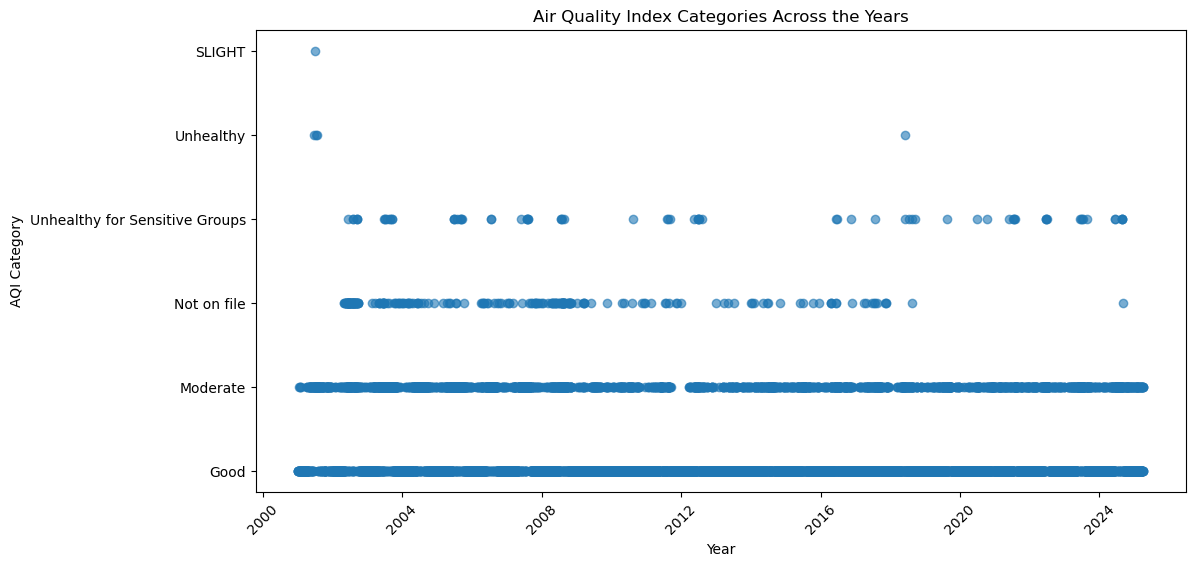

In [104]:

#lot Category across years
plt.figure(figsize=(12,6))
plt.scatter(aq_pc_data.index, aq_pc_data['Category'], alpha=0.6)

plt.xlabel("Year")
plt.ylabel("AQI Category")
plt.title("Air Quality Index Categories Across the Years")
plt.xticks(rotation=45)
plt.show()


In [73]:
# a. How many times has the AQI been recorded above 120?

aqi_above_120_count = (aq_pc_data['AQI'] > 120).sum()

print(f"The AQI has been recorded above 120 a total of {aqi_above_120_count} times.")

#b. Which years did the Air Quality Index Category become unhealthy
unhealthy_years = aq_pc_data[aq_pc_data['Category'] == 'Unhealthy'].index.year.unique()

print("The Air Quality Index Category became unhealthy in the following years:", unhealthy_years)

The AQI has been recorded above 120 a total of 14 times.
The Air Quality Index Category became unhealthy in the following years: Index([2018, 2001], dtype='int32', name='ReportDateTime')


In [ ]:
#Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

#Count occurrences of each pollen type

pollen_type_counts = aq_pc_data['PollenType'].value_counts().sort_values

print(pollen_type_counts)


<bound method Series.sort_values of PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64>


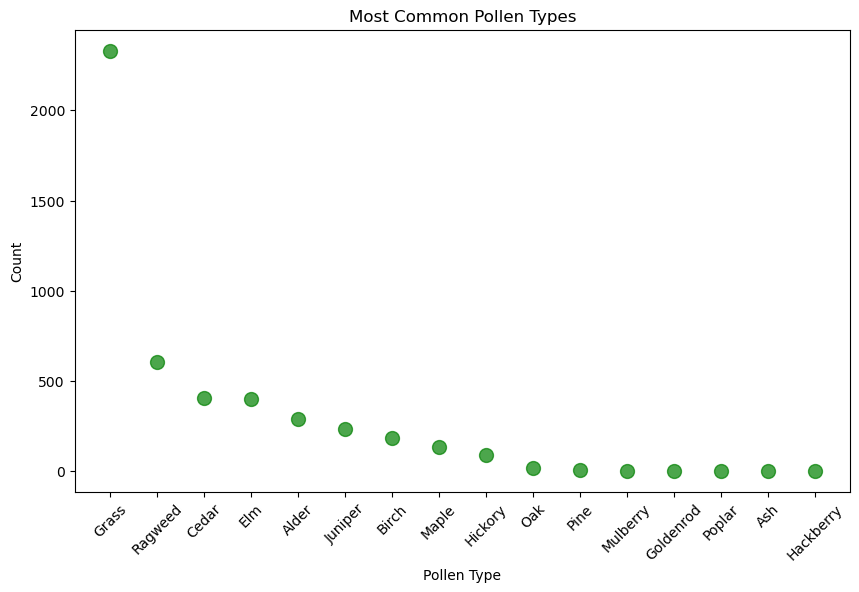

In [87]:
#Count occurrences of each pollen type
pollen_counts = aq_pc_data['PollenType'].value_counts()

#Create scatterplot
plt.figure(figsize=(10,6))
plt.scatter(pollen_counts.index, pollen_counts.values, s=100, alpha=0.7, color='green')

plt.xlabel("Pollen Type")
plt.ylabel("Count")
plt.title("Most Common Pollen Types")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='PollenType'>

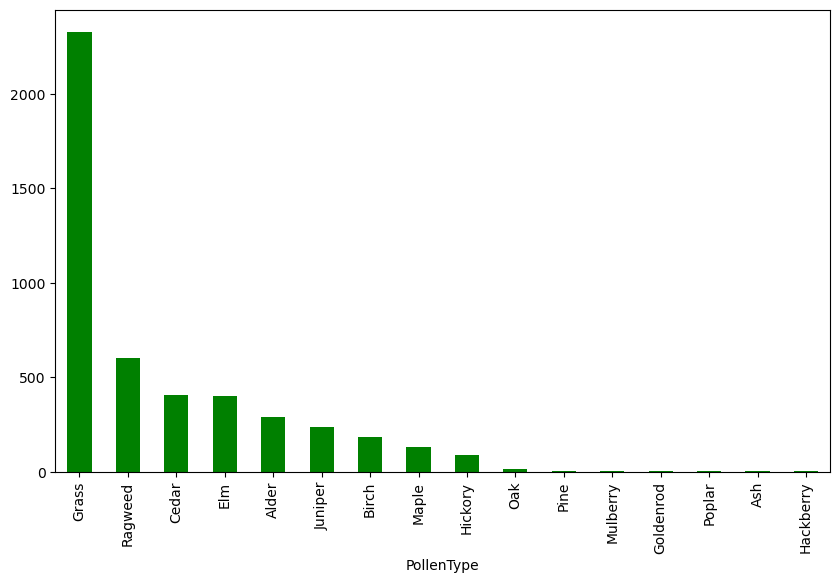

In [90]:
pollen_counts.plot(kind='bar', figsize=(10,6), color='green')

The most common pollen type is grass

The number of times the pollen count was medium to high or high is: 1848


/var/folders/w3/2ys_z3494239yphksgyy1q800000gn/T/ipykernel_46449/3814631131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pollen_counts['PollenType'] = high_pollen_counts['PollenType'].astype(str)


<Axes: xlabel='PollenType', ylabel='PollenCount'>

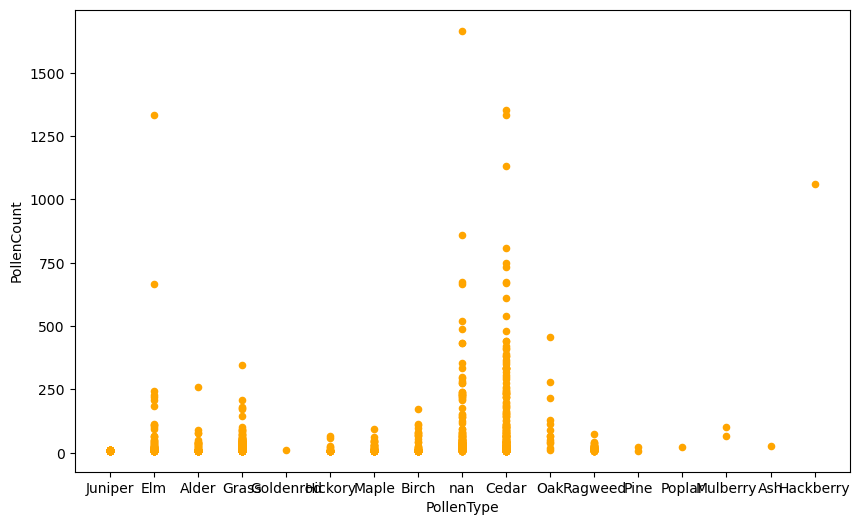

In [97]:
#calculate high pollen counts over the years

#7.3 to 9.6 Medium – High
#9.7 to 12.0 High'

high_pollen_counts = aq_pc_data[aq_pc_data['PollenCount'] >= 7.3]

high_pollen_count = len(high_pollen_counts) 

print(f"The number of times the pollen count was medium to high or high is: {high_pollen_count}")

high_pollen_counts['PollenType'] = high_pollen_counts['PollenType'].astype(str)
high_pollen_counts.plot(kind='scatter', x='PollenType', y='PollenCount', color='orange', figsize=(10, 6))

In [ ]:
#Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?

Based on the data, Nashville appears to have a good to moderate level of air quality.

The AQI values change over the years, with several instances of unhealthy air quality levels. 

The presence of various pollen types also indicates potential challenges for individuals with allergies. 

Overall, while Nashville may be comfortable for residents, those sensitive to air quality and pollen may find it less so during certain periods. 

In [ ]:
#Question 4: [A vectorization problem]. 

#Compare the manual approach versus a vectorized approach to find the mean AQI for each Air Quality Category ('Category' in the table)

#For the vectorized method, you can use groupby() and mean() method in pandas datatype (ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a

#regular for-loop can be used. Calculate the time difference between the two approaches and evaluate.


# Assume your dataframe is aq_pc_data with columns 'AQI' and 'Category'

# ---------------- Vectorized approach ----------------
time_start = time.time()  # record start
vec_means = aq_pc_data.groupby('Category')['AQI'].mean()
time_end = time.time()    # record end
vec_time = time_end - time_start
print("Vectorized approach (groupby):")
print(vec_means)
print(f"Time taken: {vec_time:.6f} seconds\n")

# 
time_start = time.time()  # record start
category_sums = {}
category_counts = {}

for idx, row in aq_pc_data.iterrows():
    cat = row['Category']
    aqi = row['AQI']
    if cat not in category_sums:
        category_sums[cat] = 0
        category_counts[cat] = 0
    category_sums[cat] += aqi
    category_counts[cat] += 1

manual_means = {cat: category_sums[cat] / category_counts[cat] for cat in category_sums}
time_end = time.time()    # record end
man_time = time_end - time_start
print("Manual loop approach:")
print(manual_means)
print(f"Time taken: {man_time:.6f} seconds\n")

# ---------------- Compare ----------------
print("Both approaches produce the same results:", 
      all(abs(vec_means[cat] - manual_means[cat]) < 1e-6 for cat in manual_means))
print(f"Vectorized is about {man_time/vec_time:.2f}× faster")


Vectorized approach (groupby):
Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Time taken: 0.006721 seconds

Manual loop approach:
{'Good': 36.966282757469536, 'Moderate': 62.240839694656486, 'Not on file': nan, 'Unhealthy for Sensitive Groups': 110.07894736842105, 'Unhealthy': 127.5, 'SLIGHT': 60.0}
Time taken: 0.100893 seconds

Both approaches produce the same results: False
Vectorized is about 15.01× faster
